In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL do site IPEADATA
url = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view'

# Faz uma requisição GET ao site e captura a resposta
response = requests.get(url)

# Verifica se a requisição foi bem sucedida
if response.status_code == 200:
    # Cria um objeto BeautifulSoup para analisar o HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Procura pela tabela no HTML analisado (o id ou classe pode variar)
    # Você precisaria inspecionar o HTML para obter o seletor correto
    table = soup.find('table', {'id': 'grd_DXMainTable'})

    # Usa o pandas para ler a tabela HTML diretamente para um DataFrame
    df = pd.read_html(str(table),skiprows=0)[0]

    df.columns = df.iloc[0]
    df = df.drop(0)

    # Mostra as primeiras linhas do DataFrame
    df.head()
else:
    print('Falha ao acessar a página: Status Code', response.status_code)


C:\Users\baceio\AppData\Local\Temp\ipykernel_7804\2360200321.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table),skiprows=0)[0]


In [47]:
df

,Data,Preço - petróleo bruto - Brent (FOB)
1,03/05/2024,8360
2,02/05/2024,8481
3,01/05/2024,8355
4,30/04/2024,8823
5,29/04/2024,8844
...,...,...
11160,26/05/1987,1863
11161,25/05/1987,1860
11162,22/05/1987,1855
11163,21/05/1987,1845


In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

# Função para atualizar o DataFrame com novos dados
def update_dataframe(df, new_data):
    # Converte a coluna 'Data' para datetime
    df['Data'] = pd.to_datetime(df['Data'])
    new_data['Data'] = pd.to_datetime(new_data['Data'], dayfirst=True)

    # Encontra a data mais recente no DataFrame existente
    last_date = df['Data'].max()

    # Filtra as novas linhas que são mais recentes do que a última data
    new_rows = new_data[new_data['Data'] > last_date]

    # Concatena os novos dados com o DataFrame existente se houver novas linhas
    if not new_rows.empty:
        updated_df = pd.concat([df, new_rows], ignore_index=True)
    else:
        updated_df = df

    return updated_df

# URL do site IPEADATA
url = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view'

# Faz uma requisição GET ao site e captura a resposta
response = requests.get(url)

# Verifica se a requisição foi bem sucedida
if response.status_code == 200:
    # Cria um objeto BeautifulSoup para analisar o HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    # Procura pela tabela no HTML analisado
    table = soup.find('table', {'id': 'grd_DXMainTable'})
    # Usa o pandas para ler a tabela HTML diretamente para um DataFrame
    new_df = pd.read_html(str(table), header=0)[0]

    # Verifica se o arquivo do DataFrame existe e carrega, ou cria um novo DataFrame se não existir
    path = 'ipea.csv'
    try:
        existing_df = pd.read_csv(path)
    except FileNotFoundError:
        existing_df = new_df  # Se o arquivo não existir, considere os dados atuais como o DataFrame existente

    # Atualiza o DataFrame existente com novos dados (carga incremental)
    updated_df = update_dataframe(existing_df, new_df)

    updated_df['Preço - petróleo bruto - Brent (FOB)'] = updated_df['Preço - petróleo bruto - Brent (FOB)']/100

    # Salva o DataFrame atualizado para o arquivo
    updated_df.to_csv(path, index=False)

    # Mostra as primeiras linhas do DataFrame atualizado
    updated_df.head()
else:
    print('Falha ao acessar a página: Status Code', response.status_code)

C:\Users\baceio\AppData\Local\Temp\ipykernel_7804\1575919605.py:39: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_df = pd.read_html(str(table), header=0)[0]


In [49]:
updated_df

,Data,Preço - petróleo bruto - Brent (FOB)
0,2024-05-03,0.8360
1,2024-05-02,0.8481
2,2024-05-01,0.8355
3,2024-04-30,0.8823
4,2024-04-29,0.8844
...,...,...
11159,1987-05-26,0.1863
11160,1987-05-25,0.1860
11161,1987-05-22,0.1855
11162,1987-05-21,0.1845


In [50]:
# import pandas as pd
# import torch
# import torch.nn as nn
# from torch.optim import Adam
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import numpy as np

# # Definir o dispositivo para a GPU se disponível
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Carregar o DataFrame
# df = pd.read_csv('./work/ipea.csv')

# # Converter a coluna de data para datetime e depois para timestamp Unix
# df['Data'] = pd.to_datetime(df['Data'])
# df = df.sort_values(by='Data',ascending=True)
# df['Timestamp'] = df['Data'].values.astype('int64') // 10**9

# # Escalar a coluna de preços, já que os modelos de DL geralmente funcionam melhor com dados normalizados
# scaler = MinMaxScaler(feature_range=(-1, 1))
# df['Preço - petróleo bruto - Brent (FOB)'] = scaler.fit_transform(df['Preço - petróleo bruto - Brent (FOB)'].values.reshape(-1, 1)).astype('float32')

# # Preparar dados para o PyTorch
# X = df['Timestamp'].values.astype('float32')  # A entrada do modelo será o timestamp
# y = df['Preço - petróleo bruto - Brent (FOB)'].values.astype('float32')  # A saída do modelo serão os preços

# # Dividir o conjunto de dados em treinamento e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # Converter os dados para Tensor
# X_train_tensor = torch.tensor(X_train).view(-1, 1, 1)
# y_train_tensor = torch.tensor(y_train).view(-1, 1, 1)
# X_test_tensor = torch.tensor(X_test).view(-1, 1, 1)
# y_test_tensor = torch.tensor(y_test).view(-1, 1, 1)

# # Mover para o dispositivo apropriado
# X_train_tensor = X_train_tensor.to(device)
# y_train_tensor = y_train_tensor.to(device)
# X_test_tensor = X_test_tensor.to(device)
# y_test_tensor = y_test_tensor.to(device)

# # Definir o modelo LSTM
# class LSTMModel(nn.Module):
#     def __init__(self, input_size=1, hidden_layer_size=200, output_size=1):
#         super(LSTMModel, self).__init__()
#         self.hidden_layer_size = hidden_layer_size

#         self.lstm = nn.LSTM(input_size, hidden_layer_size ,num_layers=3)

#         self.linear = nn.Linear(hidden_layer_size, output_size)

#     def forward(self, input_seq):
#         lstm_out, _ = self.lstm(input_seq)
#         predictions = self.linear(lstm_out.view(len(input_seq), -1))
#         return predictions[-1]

# # Instanciar o modelo
# model = LSTMModel().to(device)

# # Definir a função de perda e o otimizador
# loss_function = nn.MSELoss()
# optimizer = Adam(model.parameters(), lr=0.0001)

# # Treinar o modelo
# epochs = 1 # troquei de 10 para 1 para não torrar a CPU
# for i in range(epochs):
#     for seq, labels in zip(X_train_tensor, y_train_tensor):
#         optimizer.zero_grad()

#         model.hidden = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
#                         torch.zeros(1, 1, model.hidden_layer_size).to(device))

#         y_pred = model(seq)

#         single_loss = loss_function(y_pred, labels)
#         single_loss.backward()
#         optimizer.step()

#         print(f'Epoch {i} loss: {single_loss.item()}')

# model.eval()
# with torch.no_grad():
#     preds = []
#     for i in range(len(X_test)):
#         seq = X_test_tensor[i : i + 1]
#         preds.append(model(seq).cpu().numpy()[0])

# # Inverter a escala dos preços para a escala original
# actual_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))

# # Plotar
# plt.figure(figsize=(15,5))
# plt.plot(df.index[-len(actual_predictions):], actual_predictions, label='Predicted')
# plt.plot(df.index[-len(actual_predictions):], scaler.inverse_transform(y_test.reshape(-1,1)), label='Actual')
# plt.legend()
# plt.show()

In [51]:
# # Prever usando o conjunto de teste

# predictions = []
# with torch.no_grad():
#     for i in range(len(X_test)):
#         seq = X_test_tensor[i : i+1]
#         predictions.append(model(seq).item())
# predictions = np.array(predictions).reshape(-1, 1)
# predictions = scaler.inverse_transform(predictions) # Reverter escala dos dados de previsão

# # Reverter escala dos dados reais de teste
# actual = scaler.inverse_transform(y_test.reshape(-1,1))

# # Plotagem do gráfico
# plt.figure(figsize=(15,6))
# plt.plot(df['Data'].iloc[-len(predictions):], actual, label='Actual Data')
# plt.plot(df['Data'].iloc[-len(predictions):], predictions, label='Predicted Data')
# plt.legend()
# plt.title('Preços reais vs previsões')
# plt.xlabel('Data')
# plt.ylabel('Preço')
# plt.grid(True)
# plt.show()

Mean Squared Error: 0.0002841164305568699
Mean Absolute Error: 0.011865183317852222


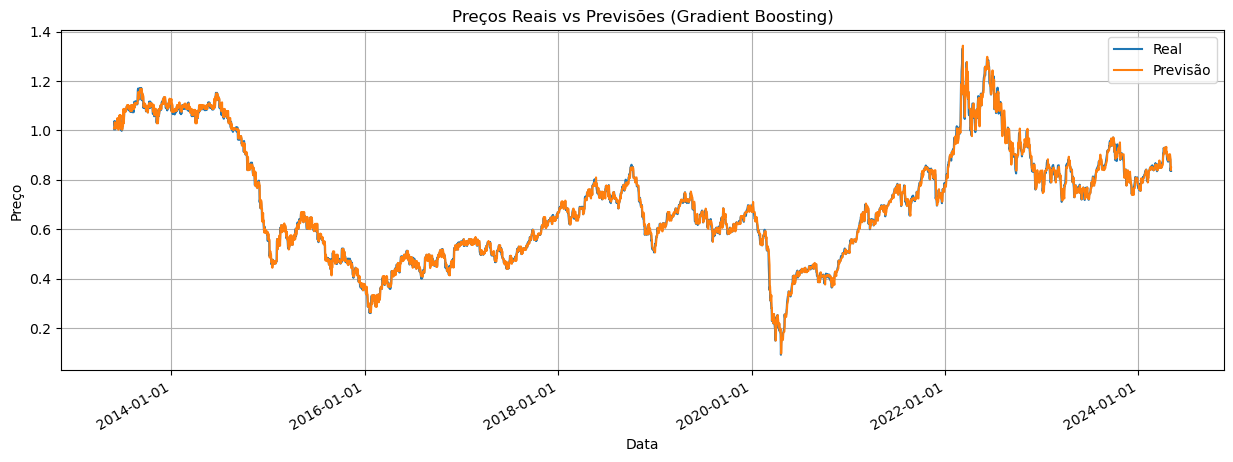

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Carregar o DataFrame
df = pd.read_csv('ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)
#df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
#df['Preço'] = df['Preço'].astype(float)  # Certifique-se de que os preços são float

# É uma boa prática criar recursos de atraso (lag features) para séries temporais
# Vamos criar alguns para nosso modelo
for lag in range(1, 2):  # Criar atrasos de 1 dia até 3 dias
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Removemos quaisquer linhas com valores NaN que foram criados ao fazer o shift
df = df.dropna()

# Preparando os dados para treinamento
X = df[['Preço_lag_1']].values  # Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values  # Output é o preço atual

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

# Criar e treinar o modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, loss='squared_error')
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Opcional: Plotando resultados reais vs previstos. Tem que ter matplotlib instalado.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 5))
plt.plot(df['Data'].iloc[-len(y_test):], y_test, label='Real')
plt.plot(df['Data'].iloc[-len(predictions):], predictions, label='Previsão')
# Melhorar a formatação do eixo x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formatar as datas como 'Ano-Mês-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())             # Escolher automaticamente a localização das datas
# Melhorar a legibilidade girando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()  # Gira as datas para evitar sobreposição
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.title('Preços Reais vs Previsões (Gradient Boosting)')
plt.show()

In [53]:
df

,Data,Preço - petróleo bruto - Brent (FOB),Preço_lag_1
1,1987-05-21,0.1845,0.1863
2,1987-05-22,0.1855,0.1845
3,1987-05-25,0.1860,0.1855
4,1987-05-26,0.1863,0.1860
5,1987-05-27,0.1860,0.1863
...,...,...,...
11159,2024-04-29,0.8844,0.8995
11160,2024-04-30,0.8823,0.8844
11161,2024-05-01,0.8355,0.8823
11162,2024-05-02,0.8481,0.8355


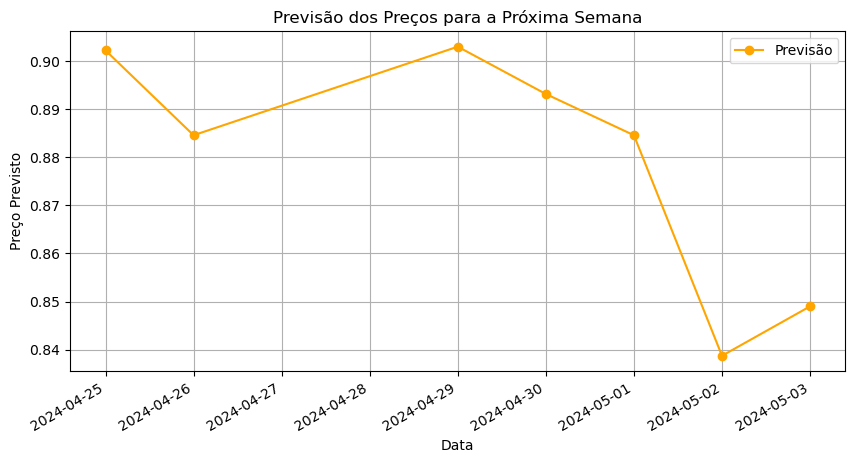

In [54]:
predictions_next_week = predictions[-7:]  # Ajustar o número conforme necessário
df_next_week_dates = df['Data'].iloc[-len(y_test):][-7:]  # Ajustar o número conforme necessário

# Plotar os resultados
plt.figure(figsize=(10, 5))
# Certifique-se de reverter os dados para que as datas sejam plotadas em ordem cronológica
plt.plot(df_next_week_dates[::-1], predictions_next_week[::-1], label='Previsão', color='orange', marker='o')

# Formatar o eixo x para apresentar as datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # Auto formatar as datas para evitar sobreposição

plt.title('Previsão dos Preços para a Próxima Semana')
plt.xlabel('Data')
plt.ylabel('Preço Previsto')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
len(predictions)

3349

In [56]:
X_train

array([[0.1863],
       [0.1845],
       [0.1855],
       ...,
       [1.0046],
       [1.0124],
       [1.0214]])

Mean Squared Error: 0.00028089005725414213
Mean Absolute Error: 0.01182371909797392
2024-05-04 00:00:00: 0.85
2024-05-05 00:00:00: 0.84
2024-05-06 00:00:00: 0.85
2024-05-07 00:00:00: 0.84
2024-05-08 00:00:00: 0.85
2024-05-09 00:00:00: 0.84
2024-05-10 00:00:00: 0.85


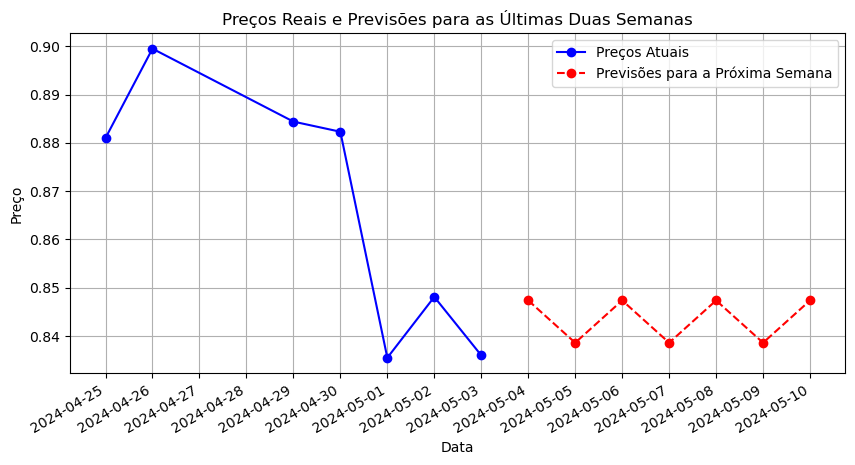

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator


# Carregar o DataFrame
df = pd.read_csv('ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)
#df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
#df['Preço'] = df['Preço'].astype(float)  # Certifique-se de que os preços são float

# É uma boa prática criar recursos de atraso (lag features) para séries temporais
# Vamos criar alguns para nosso modelo
# Criar recursos de atraso (lag features)
lags = 7
for lag in range(1, lags + 1):
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Removemos quaisquer linhas com valores NaN que foram criados ao fazer o shift
df = df.dropna()

# Preparando os dados para treinamento
X = df[['Preço_lag_1', 'Preço_lag_2']].values  # Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values  # Output é o preço atual

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Criar e treinar o modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, loss='squared_error')
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
# Fazer previsões para a próxima semana usando os últimos dados conhecidos
last_known_data = X[-1].reshape(1, -1)
next_week_predictions = []
for _ in range(7):  # para cada dia da próxima semana
    next_day_pred = model.predict(last_known_data)[0]
    next_week_predictions.append(next_day_pred)
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_pred

# As datas correspondentes à próxima semana
next_week_dates = pd.date_range(df['Data'].iloc[-1], periods=8)[1:]

# Selecionar os dados da semana atual (últimos 7 dias do dataset)
current_week_dates = df['Data'].iloc[-7:]
current_week_prices = df['Preço - petróleo bruto - Brent (FOB)'].iloc[-7:]

for week, pred in zip(next_week_dates, next_week_predictions):
    print(f'{week}: {pred:.2f}')

# Plotar os preços reais da semana atual e as previsões para a próxima semana
plt.figure(figsize=(10, 5))
plt.plot(current_week_dates, current_week_prices, 'bo-', label='Preços Atuais')
plt.plot(next_week_dates, next_week_predictions, 'r--o', label='Previsões para a Próxima Semana')

# Formatar o eixo x para exibir datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # Ajustar formato das datas para evitar sobreposição

plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preços Reais e Previsões para as Últimas Duas Semanas')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
df

,Data,Preço - petróleo bruto - Brent (FOB),Preço_lag_1,Preço_lag_2,Preço_lag_3,Preço_lag_4,Preço_lag_5,Preço_lag_6,Preço_lag_7
7,1987-05-29,0.1858,0.1860,0.1860,0.1863,0.1860,0.1855,0.1845,0.1863
8,1987-06-01,0.1865,0.1858,0.1860,0.1860,0.1863,0.1860,0.1855,0.1845
9,1987-06-02,0.1868,0.1865,0.1858,0.1860,0.1860,0.1863,0.1860,0.1855
10,1987-06-03,0.1875,0.1868,0.1865,0.1858,0.1860,0.1860,0.1863,0.1860
11,1987-06-04,0.1878,0.1875,0.1868,0.1865,0.1858,0.1860,0.1860,0.1863
...,...,...,...,...,...,...,...,...,...
11159,2024-04-29,0.8844,0.8995,0.8810,0.8902,0.8829,0.8730,0.8796,0.8834
11160,2024-04-30,0.8823,0.8844,0.8995,0.8810,0.8902,0.8829,0.8730,0.8796
11161,2024-05-01,0.8355,0.8823,0.8844,0.8995,0.8810,0.8902,0.8829,0.8730
11162,2024-05-02,0.8481,0.8355,0.8823,0.8844,0.8995,0.8810,0.8902,0.8829


# Salvar o modelo

In [59]:
import pickle
import joblib

with open('modelo_brent.pkl', 'wb') as file:
    joblib.dump(model, file)

# Carregar o modelo

In [60]:
with open('modelo_brent.pkl', 'rb') as file_2:
    modelo_brent = joblib.load(file_2)
    
prev = modelo_brent.predict(X_test)

In [61]:
prev

array([1.01167066, 1.02533633, 1.02490576, ..., 0.88568973, 0.83837538,
       0.84737271])

In [62]:
x_base = pd.DataFrame(X, columns=['Preço_lag_1', "Preço_lag_2"])

In [63]:
x_base.to_csv('lag_features.csv')